# 01) Importación de librerias

In [1]:
#Importación de librerias básicas
import numpy as np
import pandas as pd

In [2]:
#Importación de librerias para ploteo
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

/home/angeltabia/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
#Importación de librerias para preprocesamiento de data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
#Importación de librerias para modelos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#Importación de librerias de métricas
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [6]:
#Importación de librerias para feature selection
from sklearn.feature_selection import RFECV, VarianceThreshold
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV, LassoLarsIC

In [7]:
#Importación de libreria para PCA
from sklearn.decomposition import PCA

# 02) Importación de data set

In [8]:
pwd

'/home/angeltabia/Escritorio/Data Science/Clases/Clase 5'

In [10]:
#Importación de data set
breast = pd.read_csv('/home/angeltabia/Escritorio/Data Science/Clases/Clase 5/clase_05_breast_wiscon_data.csv',
                     delimiter=';')
breast.shape

(569, 32)

In [11]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 03) Partición y Preprocesamiento de data

In [12]:
#Partición X & Y
x = breast.iloc[:,2:]
y = breast.iloc[:,1]

In [13]:
#Label encoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [14]:
#Separación training & testing data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [15]:
#Standard scaler
scaler = StandardScaler().fit(xtrain)
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest)

# 04) Analisis de Componentes Principales (PCA)

In [16]:
#Principal 20 components
n_comps = 20
sklearn_pca = PCA(n_components = n_comps)
xpca = pd.DataFrame(sklearn_pca.fit_transform(xtrain_scal))
eigenvalues = sklearn_pca.explained_variance_ratio_

# Observamos los autovalores obtenidos del PCA

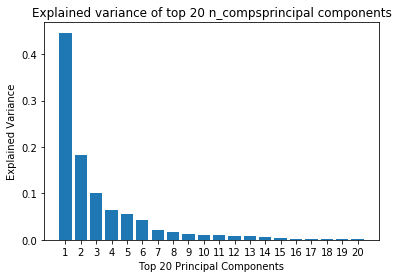

In [17]:
components = range(1 , n_comps + 1)
plt.bar(components,eigenvalues)
plt.xticks(components)
plt.title('Explained variance of top 20 n_compsprincipal components')
plt.xlabel('Top 20 Principal Components')
plt.ylabel('Explained Variance')
plt.show()

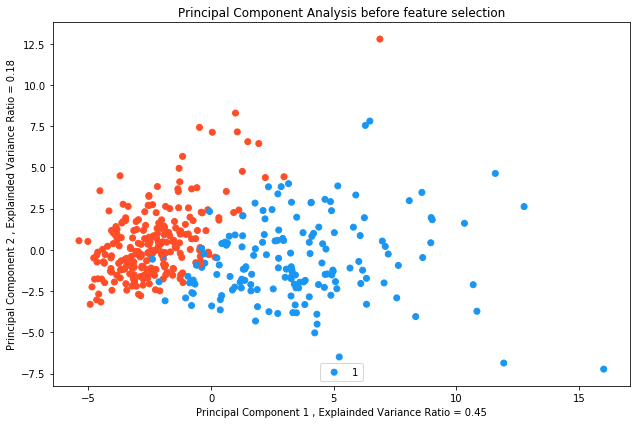

In [18]:
#Plot de los 2 principal components del PCA 
y_pca = np.reshape(np.array(ytrain),(len(ytrain),1))
col = np.zeros((len(y_pca[:,0]),4))
for t in range(len(y_pca[:,0])):
    if y_pca[t,0] == 1:
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.2, 0.4, 1)),(4,))
    else: 
        col[t,] += np.reshape(cm.rainbow(np.linspace(0.9, 0.6, 1)),(4,))
  
plt.figure(figsize = (9,6))
plt.scatter(xpca.loc[:,0], xpca.loc[:,1], c = col)    
plt.xlabel('Principal Component 1 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[0],2)))
plt.ylabel('Principal Component 2 , Explainded Variance Ratio = ' + str(np.round(eigenvalues[1],2)))
plt.title('Principal Component Analysis before feature selection')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

# Feature Selection con Variance Threshold

In [19]:
#Feature selection con variance threshold
thresh = 0.5
sel = VarianceThreshold(threshold = thresh)
sel.fit_transform(xtrain)

array([[   28.11,    18.47,   188.5 , ...,    18.47,   188.5 ,  2499.  ],
       [   19.79,    25.12,   130.4 , ...,    33.58,   148.7 ,  1589.  ],
       [   15.85,    23.95,   103.7 , ...,    27.66,   112.  ,   876.5 ],
       ..., 
       [   14.02,    15.66,    89.59, ...,    19.31,    96.53,   688.9 ],
       [   10.66,    15.15,    67.49, ...,    19.2 ,    73.2 ,   408.3 ],
       [   24.25,    20.2 ,   166.2 , ...,    23.99,   180.9 ,  2073.  ]])

In [20]:
print("La cantidad de Features seleccionadas son " + str(np.shape(sel.fit_transform(xtrain))[1]))

La cantidad de Features seleccionadas son 10


In [21]:
#Set de columnas seleccionadas
sel.get_support(True)

array([ 0,  1,  2,  3, 12, 13, 20, 21, 22, 23])

In [22]:
#Training set
xtrain_scal_red_thresh = sel.transform(xtrain_scal)
np.shape(xtrain_scal_red_thresh)

(398, 10)

In [23]:
#Testing set
xtest_scal_red_thresh = sel.transform(xtest_scal)
np.shape(xtest_scal_red_thresh)

(171, 10)

# Feature Selection con Lasso

In [24]:
#Feature Selection con Lasso
lasso_featsel = Lasso(alpha = 0.01).fit(xtrain_scal,ytrain)

In [25]:
#Features que la selección elimino asignando su coeficiente == 0
lasso_featsel.coef_

array([ 0.00717021,  0.014669  ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.02413409,  0.        , -0.01017752,
        0.00161471,  0.        ,  0.        , -0.        ,  0.00913922,
       -0.00117641, -0.        ,  0.        , -0.        , -0.        ,
        0.2160645 ,  0.04922908,  0.        , -0.        ,  0.03729621,
       -0.        ,  0.02452974,  0.09696704,  0.02751567,  0.        ])

In [26]:
lasso_num_feat_sel = int(np.count_nonzero(lasso_featsel.coef_))
print("La cantidad de features seleccionadas con Lasso son " + str(lasso_num_feat_sel))

La cantidad de features seleccionadas con Lasso son 13


In [27]:
#Lista de features que pertenecen a la selección
lasso_feat_cols = lasso_featsel.coef_ != 0
lasso_feat_cols

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True, False], dtype=bool)

In [28]:
#Training set
xtrain_scal_red_lasso = xtrain_scal[:, lasso_feat_cols]
np.shape(xtrain_scal_red_lasso)

(398, 13)

In [29]:
#Testing set
xtest_scal_red_lasso = xtest_scal[:, lasso_feat_cols]
np.shape(xtest_scal_red_lasso)

(171, 13)

# Feature Selection con RFE

In [31]:
#Feature selection con RFE utilizando un modelo 'Support Vector Machine Classifier'
costrfe = 50
svcrfe = SVC(C = costrfe, kernel = "linear")
rfecv = RFECV(estimator = svcrfe, step = 1, cv = 5, scoring = 'accuracy').fit(xtrain_scal, ytrain)

Optimal number of features : 19


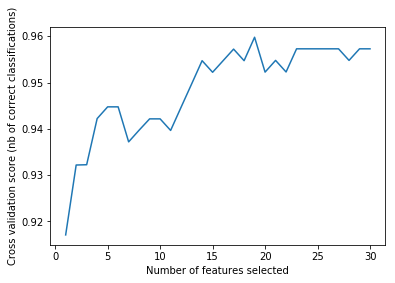

In [32]:
#Variación del accuracy en función de la cantidad de features utilizadas
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [33]:
#Features seleccionadas por RFE
feat_rfe = rfecv.support_ == True
feat_rfe

array([ True, False,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True], dtype=bool)

In [34]:
print("La cantidad de variables seleccionadas con RFE son = " + str(rfecv.n_features_))

La cantidad de variables seleccionadas con RFE son = 19


In [35]:
#Training set
xtrain_scal_red_rfe = xtrain_scal[:,rfecv.support_]
np.shape(xtrain_scal_red_rfe)

(398, 19)

In [36]:
#Testing set
xtest_scal_red_rfe = xtest_scal[:,rfecv.support_]
np.shape(xtest_scal_red_rfe)

(171, 19)

# Asignación 01: Realizar un PCA con los dataset obtenidos luego de cada metodo de feature selection.

## 01.1 - Featured Selection with Varience Theshold

In [38]:
#Autovalores del data set obtenido con Variance Theshold
sklearn_pca_vt = PCA(n_components= 'mle')

#Training data
xtrain_pca_vt = pd.DataFrame(sklearn_pca_vt.fit_transform(xtrain_scal_red_thresh))
#Testing data
xtest_pca_vt = pd.DataFrame(sklearn_pca_vt.transform(xtest_scal_red_thresh))

## 01.2 - Featured Selection with Recursive Feature Elimination

In [40]:
#Autovalores del data set obtenido con Recursive Feature Elimination
sklearn_pca_rfe = PCA(n_components= 'mle')

#Training data
xtrain_pca_rfe = pd.DataFrame(sklearn_pca_rfe.fit_transform(xtrain_scal_red_rfe))
#Testing data
xtest_pca_rfe = pd.DataFrame(sklearn_pca_rfe.transform(xtest_scal_red_rfe))

## 01.3 - Featured Selection with Lasso

In [41]:
#Autovalores del data set obtenido con Recursive Feature Elimination
sklearn_pca_lasso = PCA(n_components= 'mle')

#Training data
xtrain_pca_lasso = pd.DataFrame(sklearn_pca_lasso.fit_transform(xtrain_scal_red_lasso))
#Testing data
xtest_pca_lasso = pd.DataFrame(sklearn_pca_lasso.transform(xtest_scal_red_lasso))

# Asignación 02: Comparar cual es el grado de solapamiento de variables seleccionadas para los 3 metodos vistos.

In [42]:
xtrain.loc[ : ,(lasso_feat_cols) & (sel.get_support()) & rfecv.get_support()].head()

,radius_mean,radius_worst,texture_worst
212,28.11,28.110,18.47
129,19.79,22.630,33.58
13,15.85,16.840,27.66
307,9.00,9.699,20.07
338,10.05,11.160,26.84


# Asignacion 03: Aplicar clasificadores de SVM, KNN y LR a cada uno de los nuevos datasets reducidos y comparar con accuracy  y AUC cual fue el mejor metodo de reduccion.

## 03.01 - Logistic Regression

### Varience Theshold

In [44]:
#Logistic Regression
lr_vt = LogisticRegression().fit(xtrain_pca_vt, ytrain)

/home/angeltabia/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
#Predicción
ypred_vt_lr = lr_vt.predict(xtest_pca_vt)

In [47]:
#Accuracy
print('El accuracy con el data set reducido por Varience Theshold es ' + str(accuracy_score(ytest, ypred_vt_lr)))

El accuracy con el data set reducido por Varience Theshold es 0.929824561404


In [49]:
#AUC
fpr_vt_lr, tpr_vt_lr, thresholds = roc_curve(ytest, ypred_vt_lr, pos_label = 1)
print('El AUC con el data set reducido por Varience Theshold es ' + str(auc(fpr_vt_lr, tpr_vt_lr)))

El AUC con el data set reducido por Varience Theshold es 0.923789173789


### Recursive Feature Elimination

In [50]:
#Logistic Regression
lr_rfe = LogisticRegression().fit(xtrain_pca_rfe, ytrain)

/home/angeltabia/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
#Predicción
ypred_rfe_lr = lr_rfe.predict(xtest_pca_rfe)

In [53]:
#Accuracy
print('El accuracy con el data set reducido por Recursive Feature Elimination es ' + str(accuracy_score(ytest, ypred_rfe_lr)))

El accuracy con el data set reducido por Recursive Feature Elimination es 0.959064327485


In [55]:
#AUC
fpr_rfe_lr, tpr_rfe_lr, thresholds = roc_curve(ytest, ypred_rfe_lr, pos_label = 1)
print('El AUC con el data set reducido por Recursive Feature Elimination es ' + str(auc(fpr_rfe_lr, tpr_rfe_lr)))

El AUC con el data set reducido por Recursive Feature Elimination es 0.970085470085


### Lasso

In [56]:
#Logistic Regression
lr_lasso = LogisticRegression().fit(xtrain_pca_lasso, ytrain)

/home/angeltabia/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
#Predicción
ypred_lasso_lr = lr_lasso.predict(xtest_pca_lasso)

In [58]:
#Accuracy
print('El accuracy con el data set reducido por Lasso es ' + str(accuracy_score(ytest, ypred_lasso_lr)))

El accuracy con el data set reducido por Lasso es 0.976608187135


In [59]:
#AUC
fpr_lasso_lr, tpr_lasso_lr, thresholds = roc_curve(ytest, ypred_lasso_lr, pos_label = 1)
print('El AUC con el data set reducido por Lasso es ' + str(auc(fpr_lasso_lr, tpr_lasso_lr)))

El AUC con el data set reducido por Lasso es 0.982905982906


## 03.02 - Support Vector Machine

### Varience Theshold

In [60]:
#Support Vector Classifier
svc_vt = SVC().fit(xtrain_pca_vt, ytrain)

/home/angeltabia/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:
#Predicción
ypred_vt_svc = svc_vt.predict(xtest_pca_vt)

In [62]:
#Accuracy
print('El accuracy con el data set reducido por Varience Theshold es ' + str(accuracy_score(ytest, ypred_vt_svc)))

El accuracy con el data set reducido por Varience Theshold es 0.941520467836


In [64]:
#AUC
fpr_vt_svc, tpr_vt_svc, thresholds = roc_curve(ytest, ypred_vt_svc, pos_label = 1)
print('El AUC con el data set reducido por Varience Theshold es ' + str(auc(fpr_vt_svc, tpr_vt_svc)))

El AUC con el data set reducido por Varience Theshold es 0.937321937322


### Recursive Feature Elimination

In [65]:
#Logistic Regression
svc_rfe = SVC().fit(xtrain_pca_rfe, ytrain)

/home/angeltabia/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:
#Predicción
ypred_rfe_svc = svc_rfe.predict(xtest_pca_rfe)

In [67]:
#Accuracy
print('El accuracy con el data set reducido por Recursive Feature Elimination es ' + str(accuracy_score(ytest, ypred_rfe_svc)))

El accuracy con el data set reducido por Recursive Feature Elimination es 0.959064327485


In [68]:
#AUC
fpr_rfe_svc, tpr_rfe_svc, thresholds = roc_curve(ytest, ypred_rfe_svc, pos_label = 1)
print('El AUC con el data set reducido por Recursive Feature Elimination es ' + str(auc(fpr_rfe_svc, tpr_rfe_svc)))

El AUC con el data set reducido por Recursive Feature Elimination es 0.9650997151


### Lasso

In [69]:
#Logistic Regression
svc_lasso = SVC().fit(xtrain_pca_lasso, ytrain)

/home/angeltabia/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
#Predicción
ypred_lasso_svc = svc_lasso.predict(xtest_pca_lasso)

In [71]:
#Accuracy
print('El accuracy con el data set reducido por Lasso es ' + str(accuracy_score(ytest, ypred_lasso_svc)))

El accuracy con el data set reducido por Lasso es 0.976608187135


In [73]:
#AUC
fpr_lasso_svc, tpr_lasso_svc, thresholds = roc_curve(ytest, ypred_lasso_svc, pos_label = 1)
print('El AUC con el data set reducido por Lasso es ' + str(auc(fpr_lasso_svc, tpr_lasso_svc)))

El AUC con el data set reducido por Lasso es 0.982905982906


## 03.03 - K Neighbors Classifier

### Varience Theshold

In [74]:
#Logistic Regression
knn_vt = KNeighborsClassifier().fit(xtrain_pca_vt, ytrain)

In [75]:
#Predicción
ypred_vt_knn = knn_vt.predict(xtest_pca_vt)

In [76]:
#Accuracy
print('El accuracy con el data set reducido por Varience Theshold es ' + str(accuracy_score(ytest, ypred_vt_knn)))

El accuracy con el data set reducido por Varience Theshold es 0.929824561404


In [77]:
#AUC
fpr_vt_knn, tpr_vt_knn, thresholds = roc_curve(ytest, ypred_vt_knn, pos_label = 1)
print('El AUC con el data set reducido por Varience Theshold es ' + str(auc(fpr_vt_knn, tpr_vt_knn)))

El AUC con el data set reducido por Varience Theshold es 0.918803418803


### Recursive Feature Elimination

In [78]:
#Logistic Regression
knn_rfe = KNeighborsClassifier().fit(xtrain_pca_rfe, ytrain)

In [79]:
#Predicción
ypred_rfe_knn = knn_rfe.predict(xtest_pca_rfe)

In [80]:
#Accuracy
print('El accuracy con el data set reducido por Recursive Feature Elimination es ' + str(accuracy_score(ytest, ypred_rfe_knn)))

El accuracy con el data set reducido por Recursive Feature Elimination es 0.964912280702


In [81]:
#AUC
fpr_rfe_knn, tpr_rfe_knn, thresholds = roc_curve(ytest, ypred_rfe_knn, pos_label = 1)
print('El AUC con el data set reducido por Recursive Feature Elimination es ' + str(auc(fpr_rfe_knn, tpr_rfe_knn)))

El AUC con el data set reducido por Recursive Feature Elimination es 0.969373219373


### Lasso

In [82]:
#Logistic Regression
knn_lasso = KNeighborsClassifier().fit(xtrain_pca_lasso, ytrain)

In [83]:
#Predicción
ypred_lasso_knn = knn_lasso.predict(xtest_pca_lasso)

In [84]:
#Accuracy
print('El accuracy con el data set reducido por Lasso es ' + str(accuracy_score(ytest, ypred_lasso_knn)))

El accuracy con el data set reducido por Lasso es 0.970760233918


In [85]:
#AUC
fpr_lasso_knn, tpr_lasso_knn, thresholds = roc_curve(ytest, ypred_lasso_knn, pos_label = 1)
print('El AUC con el data set reducido por Lasso es ' + str(auc(fpr_lasso_knn, tpr_lasso_knn)))

El AUC con el data set reducido por Lasso es 0.968660968661


### Comparando los resultados del Accuracy y el AUC para cada tipo de modelo, el metodo de reducción Lasso presenta una mejor performance en todos los casos

# Asignacion 04: Probar distintos hiperparametros de cada metodo de seleccion de variables y ver si se pueden mejorar los modelos.

## Se buscara mejorar la performance del modelo SVC para cada uno de los data sets reducidos

In [86]:
params_svc = [{
                'C':[1, 10, 100, 1000],
                'kernel':['linear']
},
              {
                'C':[1, 10, 100, 1000],
                'kernel':['rbf', 'poly'],
                'gamma':[0.1, 0.01, 0.001, 0.0001]                 
}]

### 04.01 - Varience Theshold

In [87]:
#Support Vector Classifier
svc_vt = SVC()

In [88]:
#Grid Search
svc_vt_grid = GridSearchCV(svc_vt, param_grid = params_svc, cv = 5).fit(xtrain_pca_vt, ytrain)

In [89]:
#Predicción
ypred_vt_svc_grid = svc_vt_grid.predict(xtest_pca_vt)

In [90]:
#Accuracy
print('El accuracy con el data set reducido por Varience Theshold es ' + str(accuracy_score(ytest, ypred_vt_svc_grid)))

El accuracy con el data set reducido por Varience Theshold es 0.953216374269


In [92]:
#AUC
fpr_vt_svc_grid, tpr_vt_svc_grid, thresholds = roc_curve(ytest, ypred_vt_svc_grid, pos_label = 1)
print('El AUC con el data set reducido por Varience Theshold es ' + str(auc(fpr_vt_svc_grid, tpr_vt_svc_grid)))

El AUC con el data set reducido por Varience Theshold es 0.950854700855


### 04.02 - Recursive Feature Elimination

In [93]:
#Logistic Regression
svc_rfe = SVC()

In [94]:
#Grid Search
svc_rfe_grid = GridSearchCV(svc_rfe, param_grid = params_svc, cv = 5).fit(xtrain_pca_rfe, ytrain)

In [95]:
#Predicción
ypred_rfe_svc_grid = svc_rfe_grid.predict(xtest_pca_rfe)

In [96]:
#Accuracy
print('El accuracy con el data set reducido por Recursive Feature Elimination es ' + str(accuracy_score(ytest, ypred_rfe_svc_grid)))

El accuracy con el data set reducido por Recursive Feature Elimination es 0.970760233918


In [97]:
#AUC
fpr_rfe_svc_grid, tpr_rfe_svc_grid, thresholds = roc_curve(ytest, ypred_rfe_svc_grid, pos_label = 1)
print('El AUC con el data set reducido por Recursive Feature Elimination es ' + str(auc(fpr_rfe_svc_grid, tpr_rfe_svc_grid)))

El AUC con el data set reducido por Recursive Feature Elimination es 0.978632478632


### 04.03 - Lasso

In [98]:
#Logistic Regression
svc_lasso = SVC()

In [99]:
#Grid Search
svc_lasso_grid = GridSearchCV(svc_lasso, param_grid = params_svc, cv = 5).fit(xtrain_pca_lasso, ytrain)

In [100]:
#Predicción
ypred_lasso_svc_grid = svc_lasso_grid.predict(xtest_pca_lasso)

In [101]:
#Accuracy
print('El accuracy con el data set reducido por Lasso es ' + str(accuracy_score(ytest, ypred_lasso_svc_grid)))

El accuracy con el data set reducido por Lasso es 0.988304093567


In [102]:
#AUC
fpr_lasso_svc_grid, tpr_lasso_svc_grid, thresholds = roc_curve(ytest, ypred_lasso_svc_grid, pos_label = 1)
print('El AUC con el data set reducido por Lasso es ' + str(auc(fpr_lasso_svc_grid, tpr_lasso_svc_grid)))

El AUC con el data set reducido por Lasso es 0.991452991453


## Luego de realizar una selección de hyperparámetros se obtuvo una mejora para cada set de datos. El que mejor performo fue el set utilizando el metodo de selección Lasso.